<a href="https://colab.research.google.com/github/mhdykz/predict-student-GPA-using-a-neural-network/blob/main/student_GPA_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers


In [22]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

X_test = test_data.drop(columns=['StudentID', 'GPA'])
y_test = test_data['GPA']

categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport',
                       'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])



In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_train_preprocessed.shape, X_val_preprocessed.shape

X_test_preprocessed = preprocessor.transform(X_test)


y_pred = model.predict(X_test_preprocessed)





12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [24]:
model = models.Sequential()

model.add(layers.InputLayer(input_shape=(X_train_preprocessed.shape[1],)))

model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [25]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')


In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_preprocessed, y_train, validation_data=(X_val_preprocessed, y_val),
                    epochs=200, batch_size=32, callbacks=[early_stopping])



Epoch 1/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.4229 - val_loss: 2.9564
Epoch 2/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5513 - val_loss: 2.2250
Epoch 3/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7423 - val_loss: 1.7228
Epoch 4/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9905 - val_loss: 1.3497
Epoch 5/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2866 - val_loss: 0.9840
Epoch 6/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8604 - val_loss: 0.6972
Epoch 7/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5244 - val_loss: 0.4503
Epoch 8/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2436 - val_loss: 0.4261
Epoch 9/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1516 - val_loss: 0.3440
Epoch 10/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0155 - val_loss: 0.3099
Epoch 11/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8590 - val_loss: 0.2870
Epoch 12/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

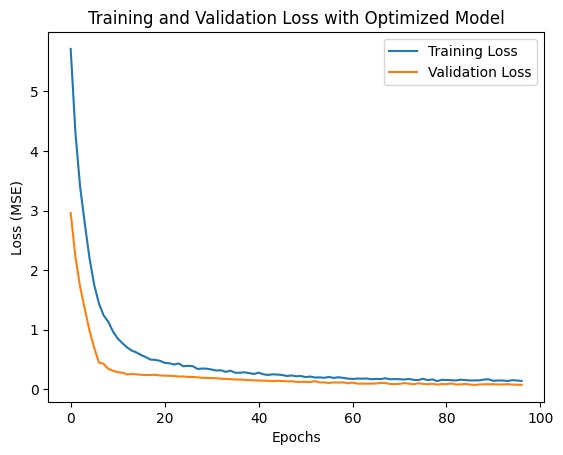

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Optimized R² Score on Test Data: 0.9236099167862909


In [27]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Optimized Model')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

from sklearn.metrics import r2_score


y_pred = model.predict(X_test_preprocessed)
r2 = r2_score(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f'Optimized R² Score on Test Data: {r2}')